## Overview

In this project, I will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This project relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [39]:
### Your code here

# Load data
df = pd.read_csv('SeoulBikeData.csv')

# show description of the BikeData
print(df.describe())

# prints information of the BikeData
df.info()

# return first 5 rows to explore the real data
df.head()


       Rented Bike Count         Hour  Temperature (C)  Humidity (%)   
count        8760.000000  8760.000000      8760.000000   8760.000000  \
mean          704.602055    11.502740        12.914361     58.240183   
std           644.997468     6.922779        12.347109     20.584774   
min             0.000000     0.000000       -17.800000    -26.000000   
25%           191.000000     6.000000         3.500000     42.000000   
50%           504.500000    12.000000        13.700000     57.000000   
75%          1065.250000    18.000000        22.500000     74.000000   
max          3556.000000    24.000000       306.000000    309.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)   
count       8759.000000       8760.000000                8759.000000  \
mean           1.953237       1436.442808                   4.074369   
std           21.376612        608.827735                  13.061011   
min            0.000000       -678.000000                 -30.6

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

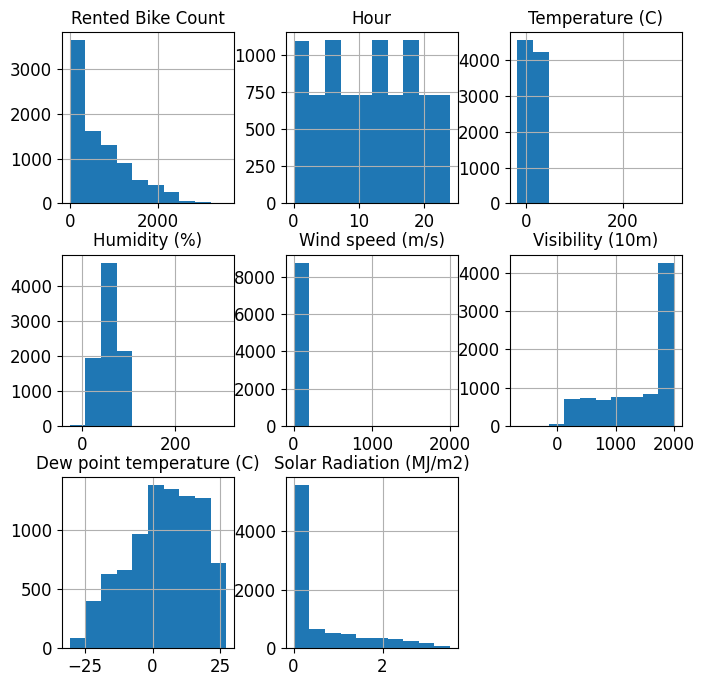

In [40]:
### Your code here

# Display each feature
df.hist(figsize=(8, 8))
plt.show()


### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [41]:
### Your code here

# ensure that the rows you are removing contain zero bike rentals
df_no = df[df['Functioning Day'] == 'No']
assert df_no['Rented Bike Count'].sum() == 0

# drop target data
df.drop(df.loc[df['Functioning Day'] == 'No'].index, inplace=True)

# drop Functioning Day feature
df.drop('Functioning Day', axis=1, inplace=True)



### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [43]:
### Your code here
# Holiday : 1, No Holiday : 0
df['Holiday'] = (df['Holiday'] == 'Holiday')*1 
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [44]:
### Your code here

# converted into separate cols 
season_dummy = pd.get_dummies(df['Seasons'])*1

# add cols
df = pd.concat([df, season_dummy], axis=1)

# drop Season feature
df.drop('Seasons', axis=1, inplace=True)


It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [45]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
# execute a function on Date feature
df['Weekday'] = df['Date'].transform(date_is_weekday)

# drop Date feature
df.drop('Date', axis=1, inplace=True)

**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [46]:
### Your code here
# Convert all the remaining data to numerical format
df = df.apply(pd.to_numeric, errors='coerce')
df.head()


,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,1


## Step 2: Visualise the data and perform further processing

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

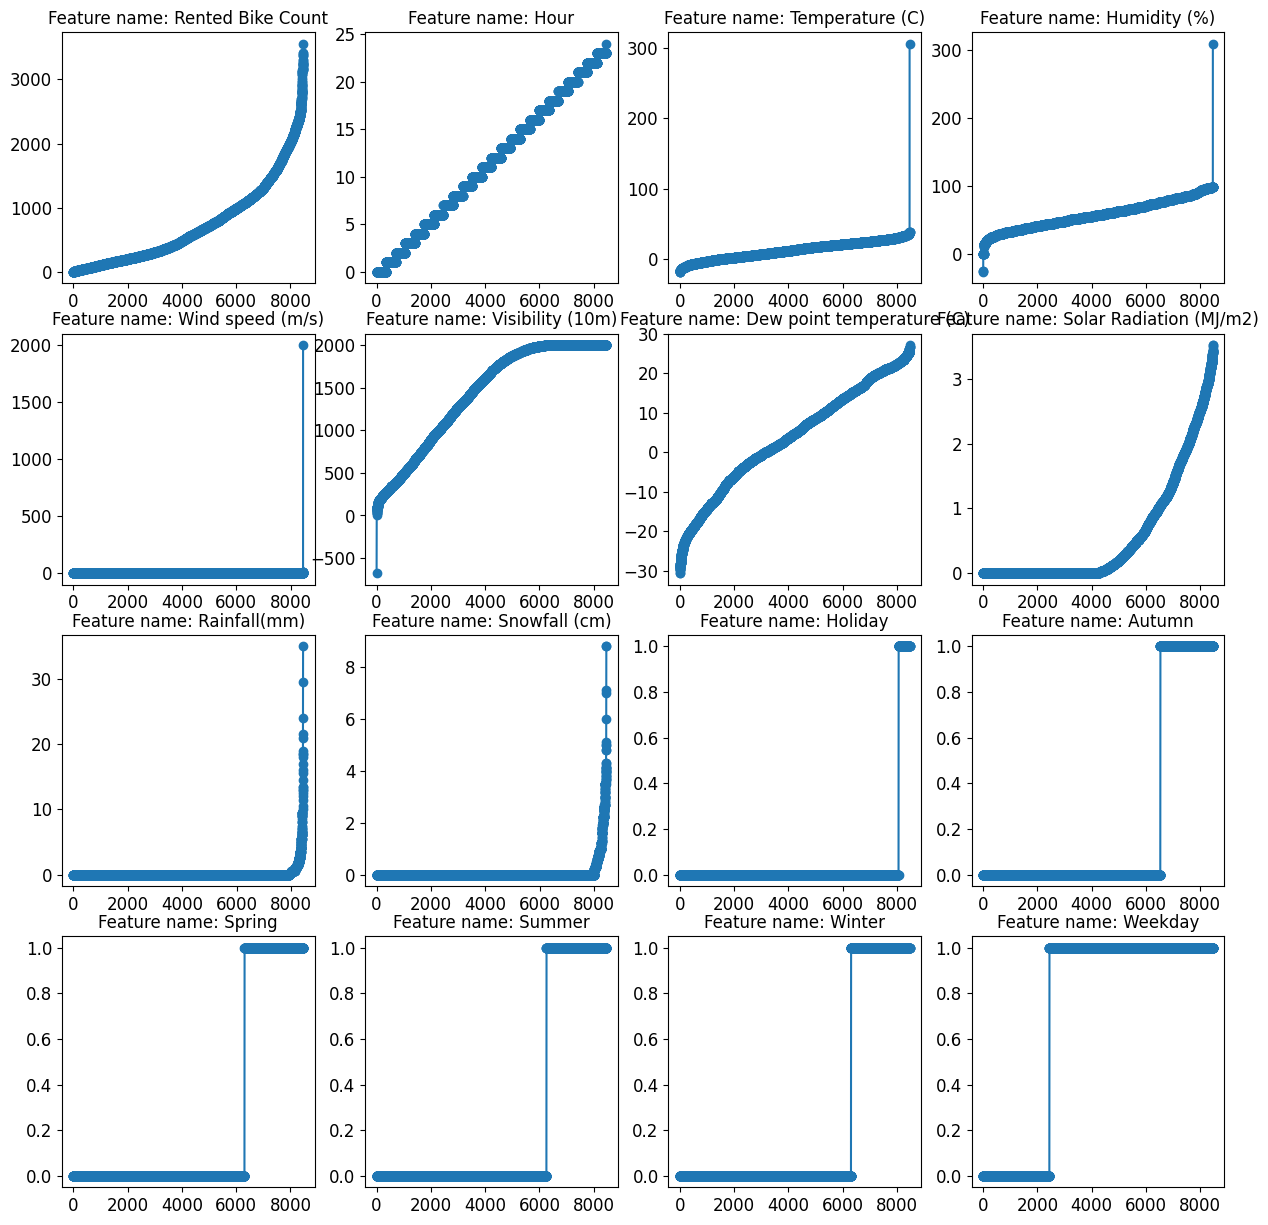

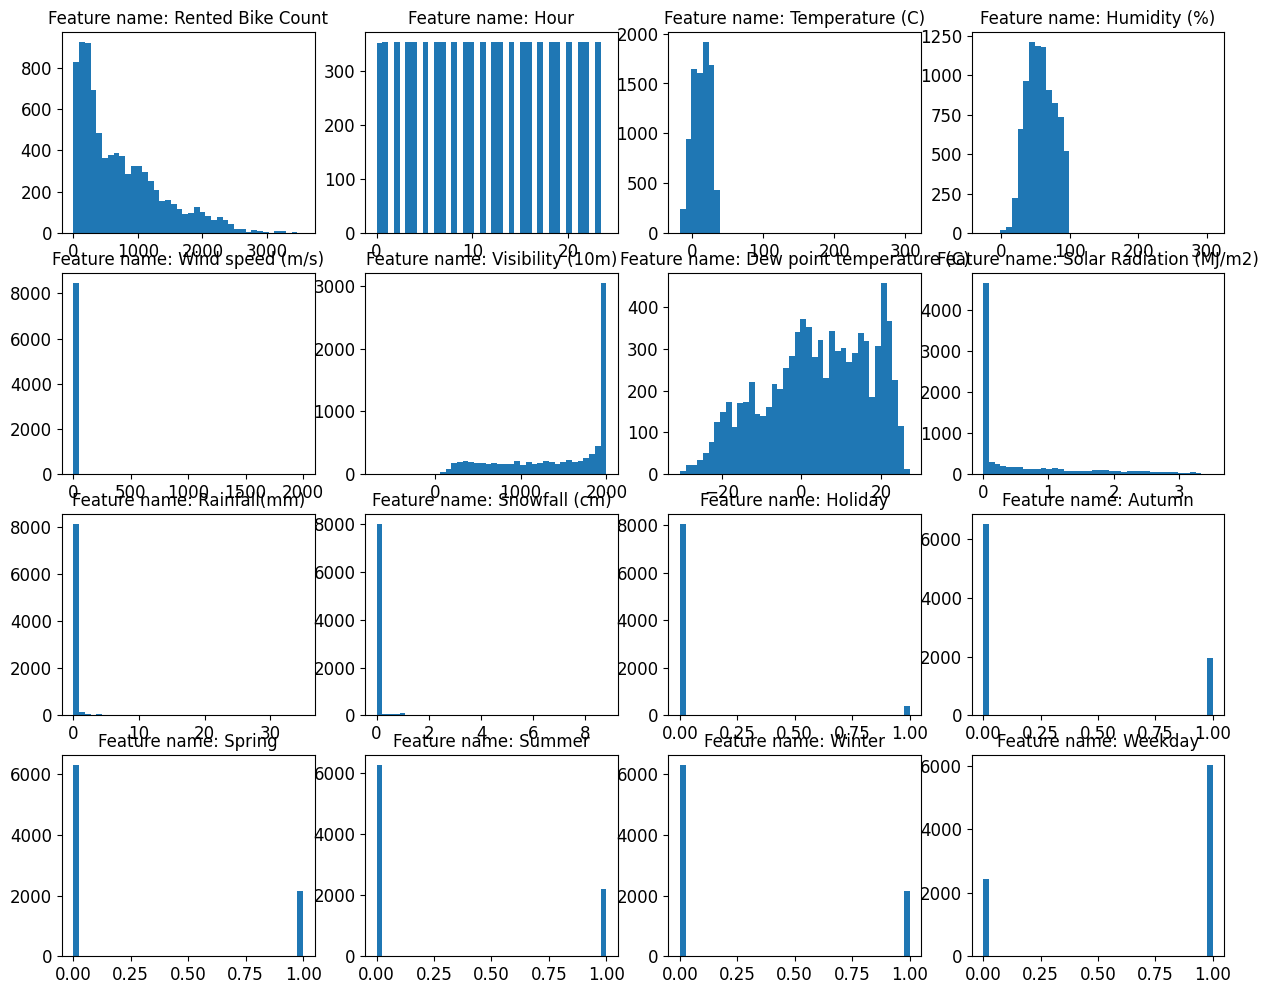

In [30]:
### Your code here

plt.figure(figsize=(15, 15))
nfeat = df.shape[1]
# Select the number of columns in our main plot 
ncol = 4
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.plot(np.sort(df.loc[:,df.columns[n]]),'-o')
    plt.title(f'Feature name: {df.columns[n]}')
plt.show()

plt.figure(figsize=(15, 12))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.hist(df.iloc[:,n],bins=40)
    plt.title(f'Feature name: {df.columns[n]}')
plt.show()


In [174]:
### Your summary sentence about problematic entries
"""
Columns Temperature (C) has a wrong value 306, Humidity (%) has wrong values [-26,-24,-24, 309],  
Wind speed (m/s) has a wrong value 2000, Visibility (10m) has a wrong value -678, which are obvious outliers.
"""

'\nColumns Temperature (C) has a wrong value 306, Humidity (%) has wrong values [-26,-24,-24, 309],  \nWind speed (m/s) has a wrong value 2000, Visibility (10m) has a wrong value -678, which are obvious outliers.\n'

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [48]:
### Your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Set problematic values to nan
df.loc[df['Temperature (C)'] > 100,'Temperature (C)'] = np.nan
df.loc[(df['Humidity (%)'] > 100) | (df['Humidity (%)'] < 0), 'Humidity (%)'] = np.nan
df.loc[df['Wind speed (m/s)'] > 100, 'Wind speed (m/s)'] = np.nan
df.loc[df['Visibility (10m)'] < 0, 'Visibility (10m)'] = np.nan

# check it worked
assert df.loc[df['Temperature (C)'] > 100,'Temperature (C)'].size == 0
assert df.loc[(df['Humidity (%)'] > 100) | (df['Humidity (%)'] < 0), 'Humidity (%)'].size == 0
assert df.loc[df['Wind speed (m/s)'] > 100, 'Wind speed (m/s)'].size == 0
assert df.loc[df['Visibility (10m)'] < 0, 'Visibility (10m)'].size == 0

# specify pipeline
pl = Pipeline([ 
               ('imputer', SimpleImputer(strategy="median")), 
               ('std_scaler', StandardScaler())
            ])


### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [49]:
### Your code here
df_tr = pd.DataFrame(pl.fit_transform(df), 
                     columns=df.columns,
                     index=df.index)

It is necessary to split the data into training and test sets before applying preprocessing steps or using pipelines. 
The preprocessing pipeline should only be fit on the training data and then applied to the training and test sets separately. 
This ensures that the model is evaluated on truly unseen data, resulting in a more accurate estimate of its performance and generalization ability. 
So, it is important to not use the pre-processed data again.

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

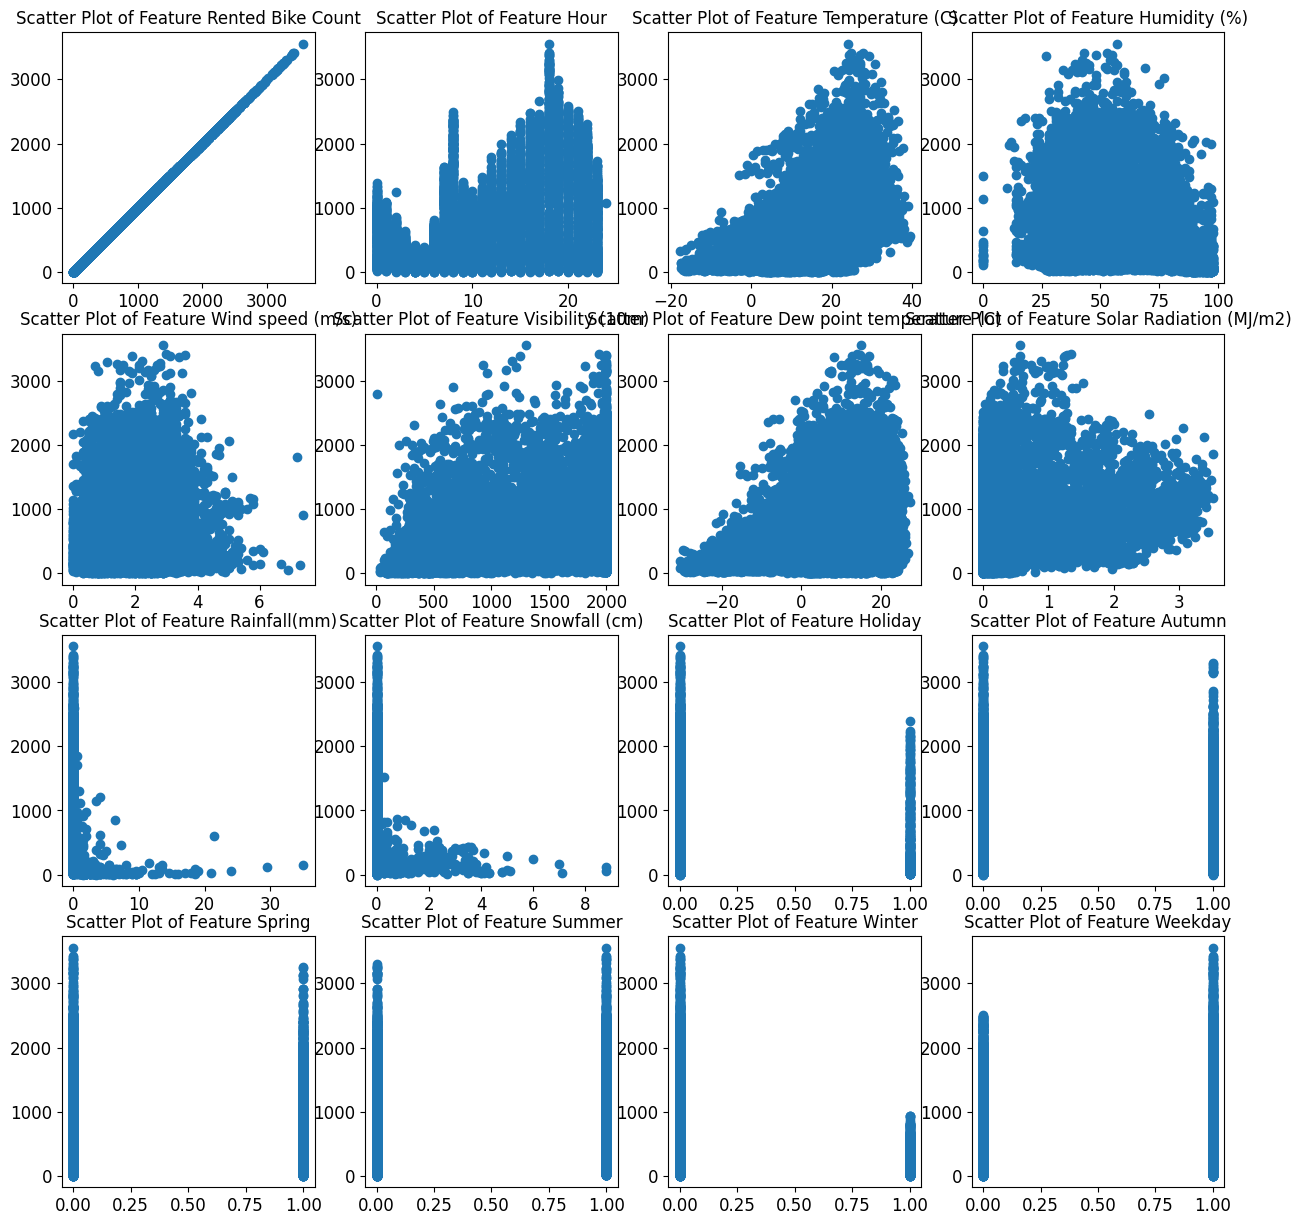

Rented Bike Count            1.000000
Temperature (C)              0.562774
Hour                         0.425460
Dew point temperature (C)    0.400248
Summer                       0.282001
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.210968
Autumn                       0.165333
Wind speed (m/s)             0.125295
Weekday                      0.046360
Spring                       0.015580
Holiday                     -0.070070
Rainfall(mm)                -0.129170
Snowfall (cm)               -0.152261
Humidity (%)                -0.201755
Winter                      -0.458920
Name: Rented Bike Count, dtype: float64

In [50]:
### Your code here
# display scatter plots
plt.figure(figsize=(15, 15))
nfeat = df.shape[1] 
ncol = 4
nrow = int(np.ceil(nfeat/ncol))
for n in range(nfeat):
    plt.subplot(nrow,ncol,n+1)
    plt.scatter(df.loc[:,df.columns[n]], df['Rented Bike Count'])
    plt.title('Scatter Plot of Feature {}'.format(df.columns[n]))
plt.show()    

# calculate correlation
corr_matrix = df.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)



From the result, features Temperature, Winter(negative correlation) and Hour are the most correlated with bike rentals. 


## Step 3: Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [51]:
### Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_set.drop(["Rented Bike Count"], axis=1)
y_train = train_set["Rented Bike Count"].copy()
X_test = test_set.drop(["Rented Bike Count"], axis=1)
y_test = test_set["Rented Bike Count"].copy()

pl_lr = Pipeline([
    ("preparation", pl),
    ('linear', LinearRegression())
])

pl_lr.fit(X_train, y_train)
y_pred = pl_lr.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred))
print("RMSE on Training Data:", rmse_train)

# Calculate the RMSE of baseline predictions (mean of training targets)
y_train_mean = np.full_like(y_train, np.mean(y_train))
rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_mean))
print("RMSE with mean:", rmse_baseline)

RMSE on Training Data: 437.29573084149735
RMSE with mean: 646.170617501773


Show an appropriate **visualisation of the fit for your linear regression.**

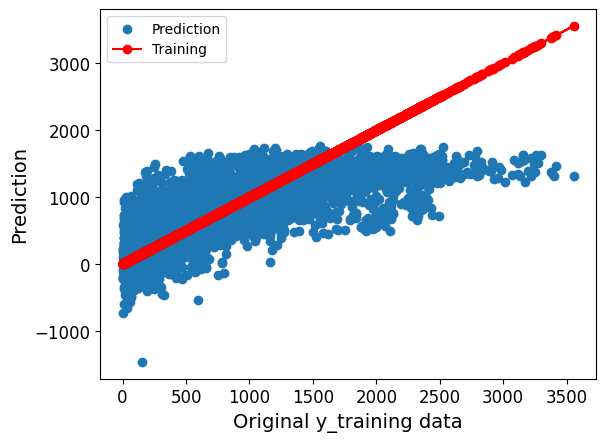

In [52]:
### Your code here

plt.scatter(y_train, y_pred)
plt.plot(y_train, y_train,'r-o')
plt.xlabel('Original y_training data')
plt.ylabel('Prediction')
plt.legend(('Prediction', 'Training'))


Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE on Training Data (Kernel Ridge): 852.149948209204


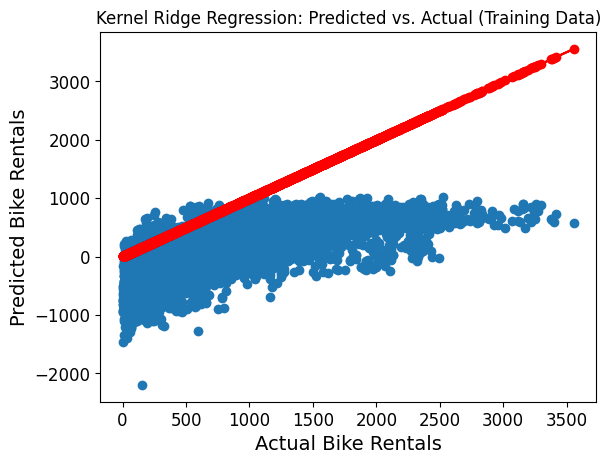

In [53]:
### Your code here
from sklearn.kernel_ridge import KernelRidge

# Build the pipeline with Kernel Ridge regression model
pl_kernel = Pipeline([
    ("preparation", pl),
    ('kernel_regression', KernelRidge())
])

# Fit the pipeline to the training data
pl_kernel.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_kernel = pl_kernel.predict(X_train)

# Calculate RMSE of the fit to the training data
rmse_train_kernel = np.sqrt(mean_squared_error(y_train, y_train_pred_kernel))
print("RMSE on Training Data (Kernel Ridge):", rmse_train_kernel)

# Create scatter plot of predicted vs. actual values for the Kernel Ridge fit
plt.scatter(y_train, y_train_pred_kernel)
plt.plot(y_train, y_train,'r-o')
plt.ylabel('Predicted Bike Rentals')
plt.xlabel('Actual Bike Rentals')
plt.title('Kernel Ridge Regression: Predicted vs. Actual (Training Data)')
plt.show()

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE on Training Data (SVR): 532.7053028975164


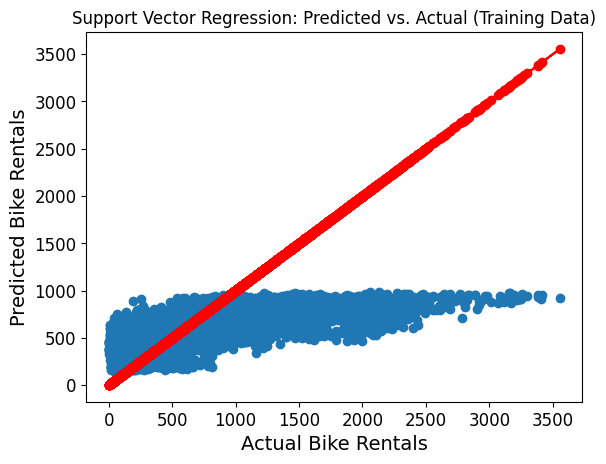

In [54]:
### Your code here
from sklearn.svm import SVR

# Build the pipeline with Support Vector Regression model
pl_svm = Pipeline([
    ("preparation", pl),
    ('svr', SVR())
])

# Fit the pipeline to the training data
pl_svm.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_svr = pl_svm.predict(X_train)

# Calculate RMSE of the fit to the training data
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
print("RMSE on Training Data (SVR):", rmse_train_svr)

# Create scatter plot of predicted vs. actual values for the SVR fit
plt.scatter(y_train, y_train_pred_svr)
plt.plot(y_train, y_train,'r-o')
plt.ylabel('Predicted Bike Rentals')
plt.xlabel('Actual Bike Rentals')
plt.title('Support Vector Regression: Predicted vs. Actual (Training Data)')
plt.show()

## Step 4: Cross validation

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [55]:
### Your code here

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

pipeline_lst = {'Linear': pl_lr, 
                'Kernel Ridge': pl_kernel, 
                'Support Vector': pl_svm
                }
# store results 
result_rmse = {'VAL': {},
               'TRAIN': {}
               }

for train_index, val_index in kf.split(X_train, y_train):
    X_trainr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_trainr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    for key in pipeline_lst:
        pipeline_lst[key].fit(X_trainr,y_trainr)
        y_pred = pipeline_lst[key].predict(X_val)
        rmse_val = np.sqrt(mean_squared_error(y_pred,y_val))
        if key in result_rmse['VAL']:
            result_rmse['VAL'][key].append(rmse_val)
        else:
            result_rmse['VAL'][key] = [rmse_val]
        y_pred = pipeline_lst[key].predict(X_trainr)
        rmse_tra = np.sqrt(mean_squared_error(y_pred,y_trainr))
        if key in result_rmse['TRAIN']:
            result_rmse['TRAIN'][key].append(rmse_tra)
        else:
            result_rmse['TRAIN'][key] = [rmse_tra]

# calculate and display rmse values of all kinds of regression
for key in pipeline_lst:
    print('mean rmse of {} Regression for validation is {}'.format(key, np.mean(result_rmse['VAL'][key])))
    print('standard deviation rmse of {} Regression for validation is {}'.format(key, np.std(result_rmse['VAL'][key])))
    print('mean rmse of {} Regression for train is {}'.format(key, np.mean(result_rmse['TRAIN'][key])))
    print('standard deviation rmse of {} Regression for train is {}'.format(key, np.std(result_rmse['TRAIN'][key])))
    print('\n')        
    

mean rmse of Linear Regression for validation is 438.49194355781435
standard deviation rmse of Linear Regression for validation is 15.491985137691142
mean rmse of Linear Regression for train is 437.2480738881286
standard deviation rmse of Linear Regression for train is 1.731681778561583


mean rmse of Kernel Ridge Regression for validation is 852.8602702726739
standard deviation rmse of Kernel Ridge Regression for validation is 16.828751348251554
mean rmse of Kernel Ridge Regression for train is 852.112805873075
standard deviation rmse of Kernel Ridge Regression for train is 2.065689856867488


mean rmse of Support Vector Regression for validation is 540.8191958065954
standard deviation rmse of Support Vector Regression for validation is 20.274576099371913
mean rmse of Support Vector Regression for train is 540.7983345446562
standard deviation rmse of Support Vector Regression for train is 2.0633488007479324




On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

All three models share the same feature that their mean rmse is relatively high compared to the range of the target variable, which indicates that they are under-fitting.
The Linear Regression model is the best considering its lowest error. But the Linear and Kernel Ridge model have quite a few negative predictions, which is meaningless and confusing in real-world scenarios. 
For me, I'd rather choose Support Vector Regression model.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [56]:
### Your code here
from sklearn.model_selection import GridSearchCV

parameters = {'svr__C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]}

pl_svr = Pipeline([
    ("preparation", pl),
    ('svr', SVR())
])
gridcv = GridSearchCV(pl_svr, cv = 10, param_grid = parameters, scoring='neg_root_mean_squared_error')
gridcv.fit(X_train, y_train)


print(gridcv.best_params_,-gridcv.best_score_)
gridcv.cv_results_['rmse_test_score'] = -gridcv.cv_results_['mean_test_score']
print(pd.DataFrame(gridcv.cv_results_)[['params','rmse_test_score','std_test_score']])

{'svr__C': 30000.0} 250.50162832914265
                params  rmse_test_score  std_test_score
0     {'svr__C': 10.0}       397.824686       15.008801
1     {'svr__C': 30.0}       361.191258       12.360105
2    {'svr__C': 100.0}       336.840570       10.478326
3    {'svr__C': 300.0}       319.398464        9.226912
4   {'svr__C': 1000.0}       299.402052        8.230148
5   {'svr__C': 3000.0}       282.101034        8.569982
6  {'svr__C': 10000.0}       263.314166        9.918591
7  {'svr__C': 30000.0}       250.501628       11.589315


rmse error on test set : 234.17361842476365


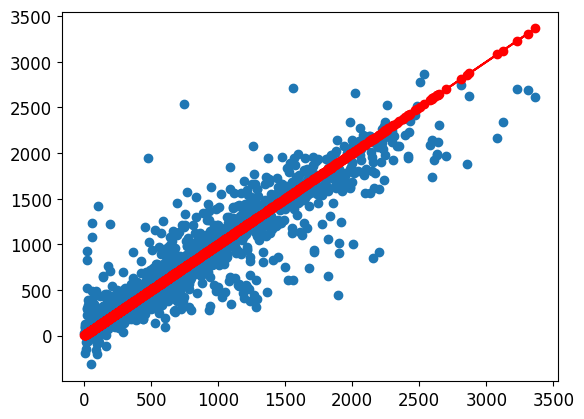

In [58]:
gridcv.best_estimator_.fit(X_train,y_train)
y_pred_gridcv = gridcv.best_estimator_.predict(X_test)
print("rmse error on test set : {}".format(np.sqrt(mean_squared_error(y_test,y_pred_gridcv))))

plt.scatter(y_test,y_pred_gridcv)
plt.plot(y_test,y_test,'r-o')

**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

When we compare the figures of origin Support Vector Regression model in step3 and the model after tuning, 
it is obvious that test set performance is better than the validation set performance.
From the cross validation step, the mean rmse of Support Vector Regression for validation is about 540, which 
is relatively high, for it's near the median value of target variable.  
But after the hyperparameter tuning, the mean rmse of the test set error is 234.19576956110038, which is relatively low,
for it's much lower than median value of target variable.
In summary, this model is not over-fitting or under-fitting.